# 유전 알고리즘
유전 알고리즘으로 해결할 수 있는 유명한 문제 중 하나인 암호 맞추기 문제를 해결해보았다.

## **비밀번호 설정**
유전 알고리즘으로 맞추고자 하는 비밀번호를 만들어준다. 이때, 초기 비밀번호가 가지는 조건은 다음과 같다.
- 8자리 이상, 12자리 이하의 길이를 가진다.
- 대소문자 구분 있는 영어와 숫자만으로 이루어진다.
- 중복되는 문자는 존재하지 않는다.

In [23]:
import random
import string

def generate_password(min_len, max_len) -> str:
    length_of_password = random.randrange(min_len, max_len)
    password = ''.join(random.sample(string.ascii_letters + string.digits, length_of_password))
    return password

inital_password = generate_password(8, 12)
print('비밀번호의 길이 : {}'.format(len(inital_password)))
print('비멀번호 : {}'.format(inital_password) )

비밀번호의 길이 : 9
비멀번호 : VKYgtJPFN


## **잠재적 솔루션 모집단 생성**
임의의 값을 가지는 잠재적 솔루션 모집단을 생성한다. 잠재적 솔루션 모집단이 가지는 특징은 다음과 같다.
- 최소 4자리 이상, 최대 14자리의 길이를 가진다.
- 대소문자 구분 있는 영어와 숫자만으로 이루어진다.
- 중복되는 문자는 존재하지 않는다.
- 초기 모집단의 크기는 150개의 염색체로 이루어진다.

In [24]:
def generate_chromosome(min_len, max_len, size):
    chromosome = []
    
    for i in range(size):
        chromosome.append(generate_password(min_len, max_len))
    return chromosome

In [25]:
world = generate_chromosome(4, 14, 150)
print('0세대 : ')
print(world)

0세대 : 
['NDPA9qvK', 'dnVWl9qLf2', 'r71HCMe8pS', 'y7LD41cai', 'Y4WIJG', 'HtiW7', 'PVay', '8WxAyvXN', 'LTbw', 's0wQBMd', 'QnKmbseJgHx0', 'wv9Gzgd', 'isVHEnBdrajA', 'PGdTjIr0', 'YPCty5Xrqj3c', '0P2bESiDykI', '8U5xEg', '4ZypD', '3f0YU9nZ', 'LOkjuB', 'dLoBfkMzS4', 'JCjvVqs', 'RmecokuZ', 'QYtU', 'mT0GjZ1J', 'XhSWeT', 'dgY9R', 'cPoxCGRUng57', '953B', 'cXm9Gd', 'coFZ', 'RowCK', '5mVC928', 'g4rUSMuzXF3o', 'C0Nv', 'm2HxtLMaCe5', 'PjovU1fuHAYG', 'Gh1R2', 'DMkU', 'KdmoihHFzeU', 'aLYSAvjfKMFzC', 'tCfBJdv98p', '5NXmUORWw', 'aBGe', 'Dymx4s', 'HILh6o0l', 'NBVob81yIOwma', 'OSURKjNYiAhD', 'vyIOU', 'pziPrN', 'XHkQOn', 'fvjCWcK', 'jO7k8N', 'b0waMdVpSWBIq', 'yJ2QF', 'E92nzXOutCid', 'ErWF36fge', 'e9TOkVrjf2Ps4', '2erCPi', 'S6H1EJs0wrm', 'Yd80DhmFxs', 'gBl1I398j', 'zAsCXWjQ', 'biW3QTGArXRn', 'NWRPp6dlr', 'vzYHywQV6JKNP', 'Cq7uihG68oVL', 'mQIR6co18', 'cdOfy5k1wFj', 'ZIs4Hjw', 'oGcn9X7', 'hgmw', 'F09bH2', 'THhwEnXjUW8', 'qOVcLudfADJ', 'IYT1lLXUErH4', 'fEpH', 'qPKi5QvnD', 'GEH7xt', 'ZJud06l4vqb', 'ZU7kX8Nj1T', 

## **모집단 내 개체 적합도 평가**
우선, 평가를 위한 개체 적합도 계산 함수를 구현한다. 개체 적합도 함수가 적합도를 계산하는 방법은 다음과 같다.
- 문자열과 비밀번호의 **길이가 같은가**? -> 1점
- 문자열의 길이가 다르면 맞춘 문자열이 몇 개가 되었든 **무조건 0점**
- 비밀번호와 **같은 문자열**이 **같은 위치**에 있는가? -> 1글자마다 3점

In [26]:
def calculate_fitness(testing_gene):
    score = 0
    
    # 길이 비교
    if len(inital_password) != len(testing_gene):
        return score

    # 길이 같으면 +1점
    score += 1
    
    # 같은 문자열 개수
    for i in range(len(inital_password)):
        if inital_password[i] == testing_gene[i]:
            score += 3

    return score

## **자연 선택**
위에서 정의한 개체 적합도 평가 함수를 바탕으로 생존할 유전자들을 고른다. 자연 선택의 과정은 다음과 같다.
- 염색체를 입력받아 염색체의 각 유전자들의 접합도를 계산하여 최고로 적합도가 높은 25개의 유전자만을 남긴다

In [28]:
def survivors(world):
    fitness_dict = {}
    for i in world:
        if i not in fitness_dict.keys():
            fitness_dict[i] = calculate_fitness(i)
        else:
            fitness_dict[i] = max(fitness_dict[i], calculate_fitness(i))
    fitness_dict = sorted(fitness_dict.items(), key = lambda item: item[1], reverse=True)
    max_score = fitness_dict[0][1]

    survivors = []
    for i in fitness_dict:
        survivors.append(i[0])
    return survivors, max_score

## **자손 번식**
자연 선택에 의해 살아남은 25개의 유전자들을 전부 교배시킨다(이는 원래 현실적인 진화 과정에서는 불가능하지만 빠르게 찾기 위해 체택한 방법이다). 이를 통해 $25^2$개, 즉 625개의 자손을 만든다. 이후, 625개의 자손들이 다시 자연 선택의 과정을 거쳐 150개의 유전자(잠재적 솔루션 모집단과 같은 크기의 집단)만을 남기게 한다.

In [29]:
def generate_child(world):
    childen_world = []
    parents = survivors(world)[0][:25]
    
    for father in parents:
        for mother in parents:
            # 교차
            division_point = random.randint(0, min(len(father), len(mother)))
            child = father[:division_point]+mother[division_point:]
            
            # 돌연변이
            chance = 0.01 # 1%의 확률
            if random.random() <= chance:
                child = list(child)
                point = random.randint(0, len(child)-1)
                child[point] = random.sample(string.ascii_letters + string.digits, 1)[0]
                childen_world.append(''.join(child))
            else:
                childen_world.append(child)
    ans = survivors(childen_world)
    return ans[0][:150], ans[1]


## **세대 시뮬레이션**
세대를 거치면서 어떻게 유전자가 최종 목표를 향해 진화하는지 관찰한다.

In [30]:
answer = []
pool = []
max_score_list = []
answer.append(world)
t = 0
while True:
    world, max_score  = generate_child(world)
    answer = world
    print('{}세대, {}개 : '.format(t, len(answer)))
    print(answer)
    print('-'*150)
    pool.append(len(answer))
    max_score_list.append(max_score)
    t += 1
    if inital_password in answer:
        break

0세대, 150개 : 
['y7LD41cai', 'y7L1I398j', 'y7LD41clr', 'yQIR6co18', 'y7LD4QvnD', 'y7LD41cd2', 'y7LD41c52', 'y7VRgCGl3', 'dOtunWoKj', 'y7LD41caY', 'y7LD41ca3', 'y7LD41cD0', '5NXmUORai', '5NXmUORWw', 'ErWF36fge', '5NXmI398j', '5NXmp6dlr', '5NXR6co18', '5NXmUQvnD', '5aBkMxVd2', '5NXmUOR52', '5DVRgCGl3', '5NXmnWoKj', '5NXmPdvkY', '5NrxTXva3', '5NXmUdnD0', 'ErWF36fgi', 'ErWF3398j', 'ErWFp6dlr', 'ErKi5QvnD', 'EaBkMxVd2', 'ErpSmvI52', 'ErWF36Gl3', 'DU4qPdvkY', 'ErWF3Xva3', 'gBl1I398i', 'gBl1IORWw', 'gBl1I39ge', 'gBl1I398j', 'gBlMI398j', 'gBlR6co18', 'gBli5QvnD', 'gBBkMxVd2', 'gBl1nWoKj', 'gBl1PdvkY', 'gBl1I39a3', 'gBl1I3nD0', 'NWRPp1cai', 'NWRPUORWw', 'NWRP36fge', 'NWRPp6dlr', 'NQIR6co18', 'NPKi5QvnD', 'NWBkMxVd2', 'NWRPp6dl2', 'NWRPp6dl3', 'NWRPnWoKj', 'NWRPp6vkY', 'NWRPpXva3', 'NCyVBdnD0', 'mQIR41cai', 'mQIR6cRWw', 'mQIR66fge', 'mQIR6co18', 'mQKi5QvnD', 'mQBkMxVd2', 'mQIRmvI52', 'mQIR6co13', 'mOtunWoKj', 'mQIR6co1Y', 'mQIR6dnD0', 'qPKi5Qvni', 'qPKi5Qvnw', 'qrWF36fge', 'qPl1I398j', 'qPRPp6dlr'

In [31]:
print('초기 비밀번호 : {}'.format(inital_password))
print('{}세대 만에 {}가 초기 비밀번호임을 찾음'.format(t, answer[0]))

초기 비밀번호 : VKYgtJPFN
300세대 만에 VKYgtJPFN가 초기 비밀번호임을 찾음


## **결론**
일반적인 진화와는 다르게, 특정한 진화의 목표(적합도 최대화)가 있어 전체적으로 세대를 거치며 유전자풀의 크기가 감소하는 것을 확인할 수 있었다.

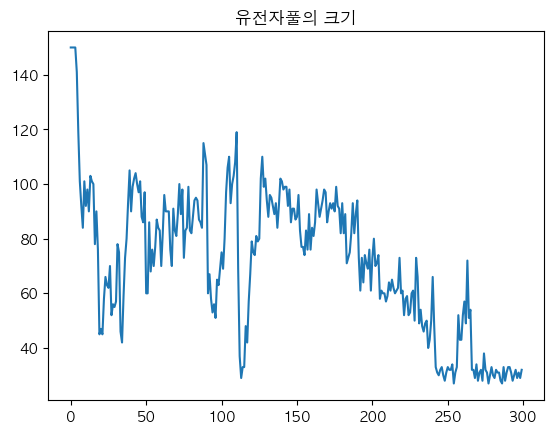

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.plot(pool)
plt.title('유전자풀의 크기')
plt.show()

또한, 세대를 거치면서 항상 최고로 적합한 유전자가 살아남기 때문에 염색체 내의 유전자 중 최고 적합도 점수는 절대 감소하지 않는 모습을 보여주었다.

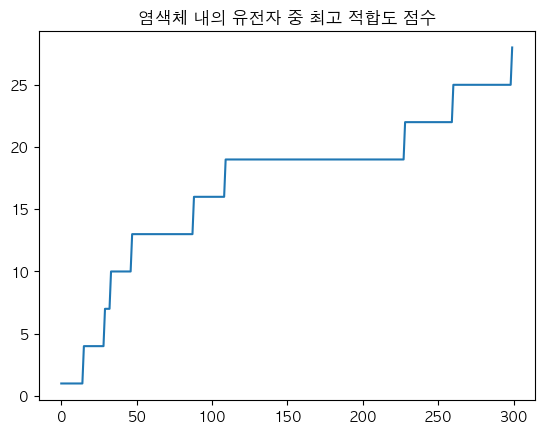

In [33]:
plt.title('염색체 내의 유전자 중 최고 적합도 점수')
plt.plot(max_score_list)
plt.show()